In [ ]:
#Installing & Importing libraries
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,accuracy_score
import itertools
import random
#!pip install keras-tuner
from keras_tuner import RandomSearch
#!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 20.1 MB/s 


Loading Data

In [ ]:
fashion_minist = keras.datasets.fashion_mnist
(images_train,labels_train),(images_test,labels_test) = fashion_minist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Shape of training clothes images: ', images_train.shape)
print('Shape of test clothes images: ', images_test.shape)

Shape of training clothes images:  (60000, 28, 28)
Shape of test clothes images:  (10000, 28, 28)


Visualizing the Dataset

Its label is : 3


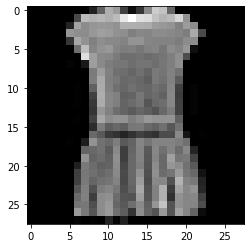

In [ ]:
#View an image of the training set
def view_images(index=0):
  img = images_train[index]
  print("Its label is :",labels_train[index])
  plt.imshow(img,'gray')
  plt.show()

view_images(3)

In [ ]:
#The labels consist of an array of integers that ranges from 0 to 9.
#The class names were not added to the dataset so we will add them.
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

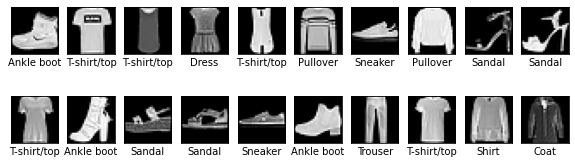

In [ ]:
plt.figure(figsize=(10, 3))  
i = 0
while i < 20:
    plt.subplot(2, 10, i+1)
    plt.imshow(images_train[i],'gray')
    plt.xlabel(class_names[labels_train[i]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    i = i+1
     
plt.show() 

Data PreProcessing

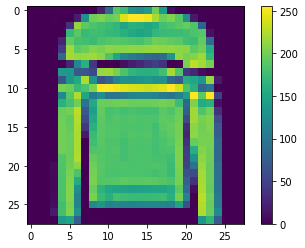

In [ ]:
def view_images_(index=0):
  img = images_train[index]
  plt.imshow(img)
  plt.colorbar()
  plt.show()
  
view_images_(5)

as we can see that the pixel values fall in the range of 0 to 255, so we need to normalize the data by dividing each by 255 to scale the value between 0 and 1.

In [ ]:
images_train = images_train / 255.0
images_test = images_test / 255.0

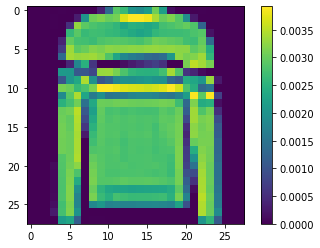

In [ ]:
view_images_(5)

Building the model

creating layers of neural network

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),          #converts the images from a 2-D array into a 1-D array 
    keras.layers.Dense(128, activation='relu'),          #first hidden layer
    keras.layers.Dense(10, activation='softmax')         #output layer
])

compiling the model


In [ ]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Model Digram

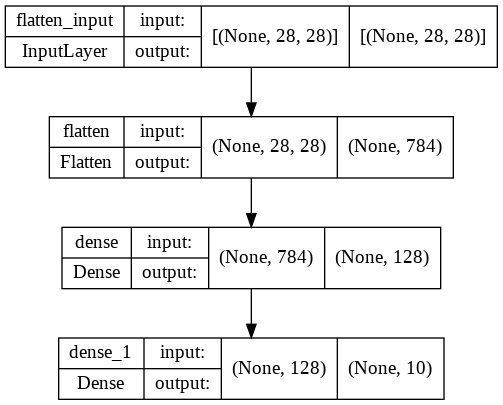

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
visualkeras.layered_view(model)

Training the model


In [ ]:
model.fit(images_train,labels_train,epochs=25,batch_size = 32)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6028 - accuracy: 0.7877
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4087 - accuracy: 0.8558
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8674
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3492 - accuracy: 0.8758
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3288 - accuracy: 0.8800
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3133 - accuracy: 0.8851
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3007 - accuracy: 0.8897
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2909 - accuracy: 0.8930
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2805 - accuracy: 0.8961
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.274

Evaluating the model


In [ ]:
model.evaluate(images_test,labels_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3829 - accuracy: 0.8753


[0.38293248414993286, 0.8752999901771545]

In [ ]:
#make predictions
pred_probs = model.predict(images_test)
pred = pred_probs.argmax(axis=1)         # convert the prediction probabilities into int

Confusion Matrix

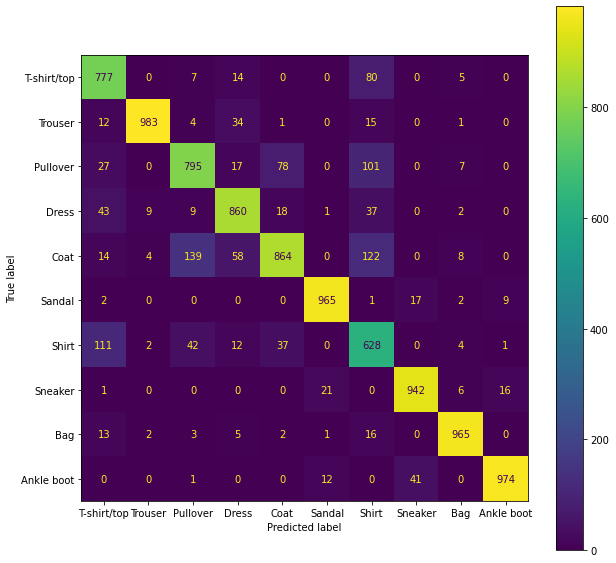

In [ ]:
cm = confusion_matrix(pred,labels_test)
p = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
p.plot(ax=ax);

In [ ]:
#classification report
print(classification_report(labels_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1000
           1       0.94      0.98      0.96      1000
           2       0.78      0.80      0.79      1000
           3       0.88      0.86      0.87      1000
           4       0.71      0.86      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.75      0.63      0.68      1000
           7       0.96      0.94      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



Visualizing predictions

In [ ]:
def plot_random_image(model,images, true_labels, classes):                      # This function plot a random image with its prediction,
                                                                                # it picks a random image, plot and label it with the predicted and actual label 
    plt.figure(figsize=(10,15))                                                 

    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        rand_index=random.choice(range(len(images)))                            
        
        #creating prediction & target 
        target_image=images[rand_index]
        pred_probs=model.predict(tf.expand_dims(target_image,axis=0))
        pred_label=classes[pred_probs.argmax()]
        true_label= classes[true_labels[rand_index]]
        plt.imshow(target_image,cmap=plt.cm.binary)
        
        if pred_label==true_label:
            color="green"
        else:
            color="red"

        plt.xlabel("Prediction is :{} {:2.0f}% \n(True:{})".format(pred_label,
                                             100*tf.reduce_max(pred_probs),
                                             true_label),
                                             color=color, fontsize=13
                                             )

        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)

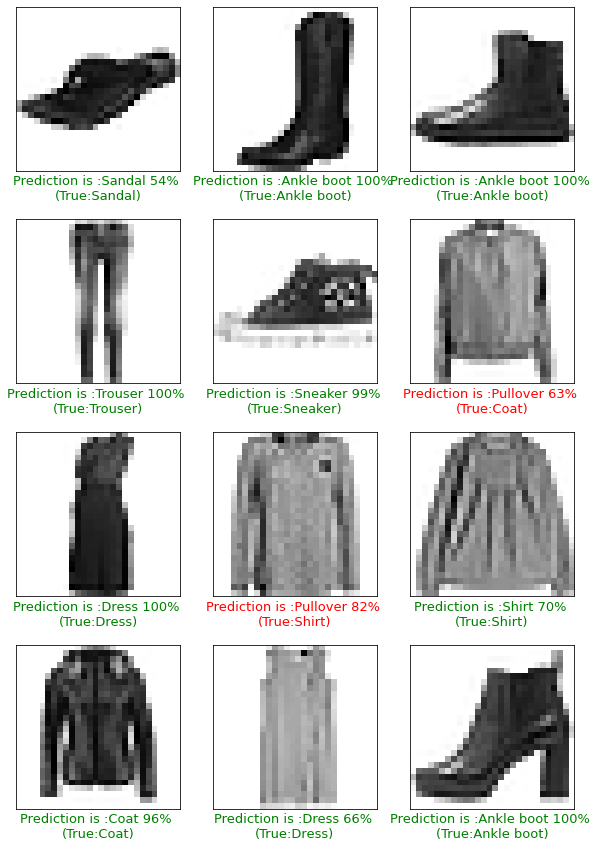

In [ ]:
plot_random_image(model,images_test,labels_test,class_names)

Making some updates to the model for better accuracy

In [ ]:
model_updated = keras.Sequential([
    #converts the images from a 2-D array into a 1-D array 
    keras.layers.Flatten(input_shape=(28, 28)),
    #first hidden layer  
    keras.layers.Dense(256, activation='relu'),
    #second layer
    keras.layers.Dense(128, activation='relu'),          
    #third layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')         #output layer
])

In [ ]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#fitting the model
model.fit(images_train,labels_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1849 - accuracy: 0.9314
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1824 - accuracy: 0.9311
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1817 - accuracy: 0.9319
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1802 - accuracy: 0.9323
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1784 - accuracy: 0.9334
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1746 - accuracy: 0.9350
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1757 - accuracy: 0.9342
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1727 - accuracy: 0.9356
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1710 - accuracy: 0.9353
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.170

In [ ]:
#Evaluating the model
model.evaluate(images_test,labels_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5061 - accuracy: 0.8756


[0.5061313509941101, 0.8755999803543091]

There is no change in the accuracy



### Let's try to tune the Hyperparameters to improve the model

we will try to optimize the following:

- Number of hidden layers
- Number of neurons in each hidden layer
- Activation Function
- Learning rate 

In [ ]:
def building_model(hp):           #hp refers to hyperparameters         
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    #range for the number of hidden layers
    for i in range(hp.Int('num_of_layers',2,20)):
      #the range for the number of neurons in the hidden layer         
        model.add(keras.layers.Dense(units=hp.Int('num_of_neurons'+ str(i), min_value=32,max_value=512,step=32),activation='relu'))
    #output layer
    model.add(keras.layers.Dense(10,activation='softmax'))   
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
#feeding the model & parameters to Random Search
tuner=RandomSearch(building_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Clothing')

INFO:tensorflow:Reloading Oracle from existing project project/Clothing/oracle.json


In [ ]:
tuner.search_space_summary()

tuner.search(images_train,labels_train,epochs=10,validation_data=(images_test,labels_test))    # fitting the tuner

Trial 5 Complete [00h 17m 50s]
val_accuracy: 0.8810999989509583

Best val_accuracy So Far: 0.8883333404858907
Total elapsed time: 01h 03m 08s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#showing 10 best trails
tuner.results_summary()

Results summary
Results in project/Clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_layers: 4
num_of_neurons0: 384
num_of_neurons1: 192
learning_rate: 0.0001
num_of_neurons2: 512
num_of_neurons3: 192
num_of_neurons4: 352
num_of_neurons5: 448
num_of_neurons6: 288
num_of_neurons7: 384
num_of_neurons8: 288
num_of_neurons9: 288
num_of_neurons10: 448
num_of_neurons11: 64
num_of_neurons12: 448
num_of_neurons13: 32
num_of_neurons14: 480
num_of_neurons15: 448
num_of_neurons16: 128
num_of_neurons17: 416
num_of_neurons18: 64
Score: 0.8883333404858907
Trial summary
Hyperparameters:
num_of_layers: 14
num_of_neurons0: 160
num_of_neurons1: 288
learning_rate: 0.0001
num_of_neurons2: 384
num_of_neurons3: 320
num_of_neurons4: 160
num_of_neurons5: 288
num_of_neurons6: 288
num_of_neurons7: 512
num_of_neurons8: 448
num_of_neurons9: 320
num_of_neurons10: 480
num_of_neurons11: 448
num_of_neurons12: 480
num_of_neurons13: 32
num_of_neurons14: 192
num_of_neurons15: 448
num_of_neurons16: 96